In [1]:
import obspy
import numpy as np
import scipy as sp

st = obspy.read("data/20101201.014700.A.SEED")

HHZ_st = obspy.core.stream.Stream()
for i in range(len(st)):
    if st[i].stats['channel'] == 'HHZ':
        HHZ_st.append(st[i]) 

In [2]:
HHZ_st

35 Trace(s) in Stream:

CN.BELQ..HHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
...
(33 other traces)
...
CN.DMCQ..HHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [3]:
import matplotlib.pylab as plt
from __future__ import print_function
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

<IPython.core.display.Javascript object>


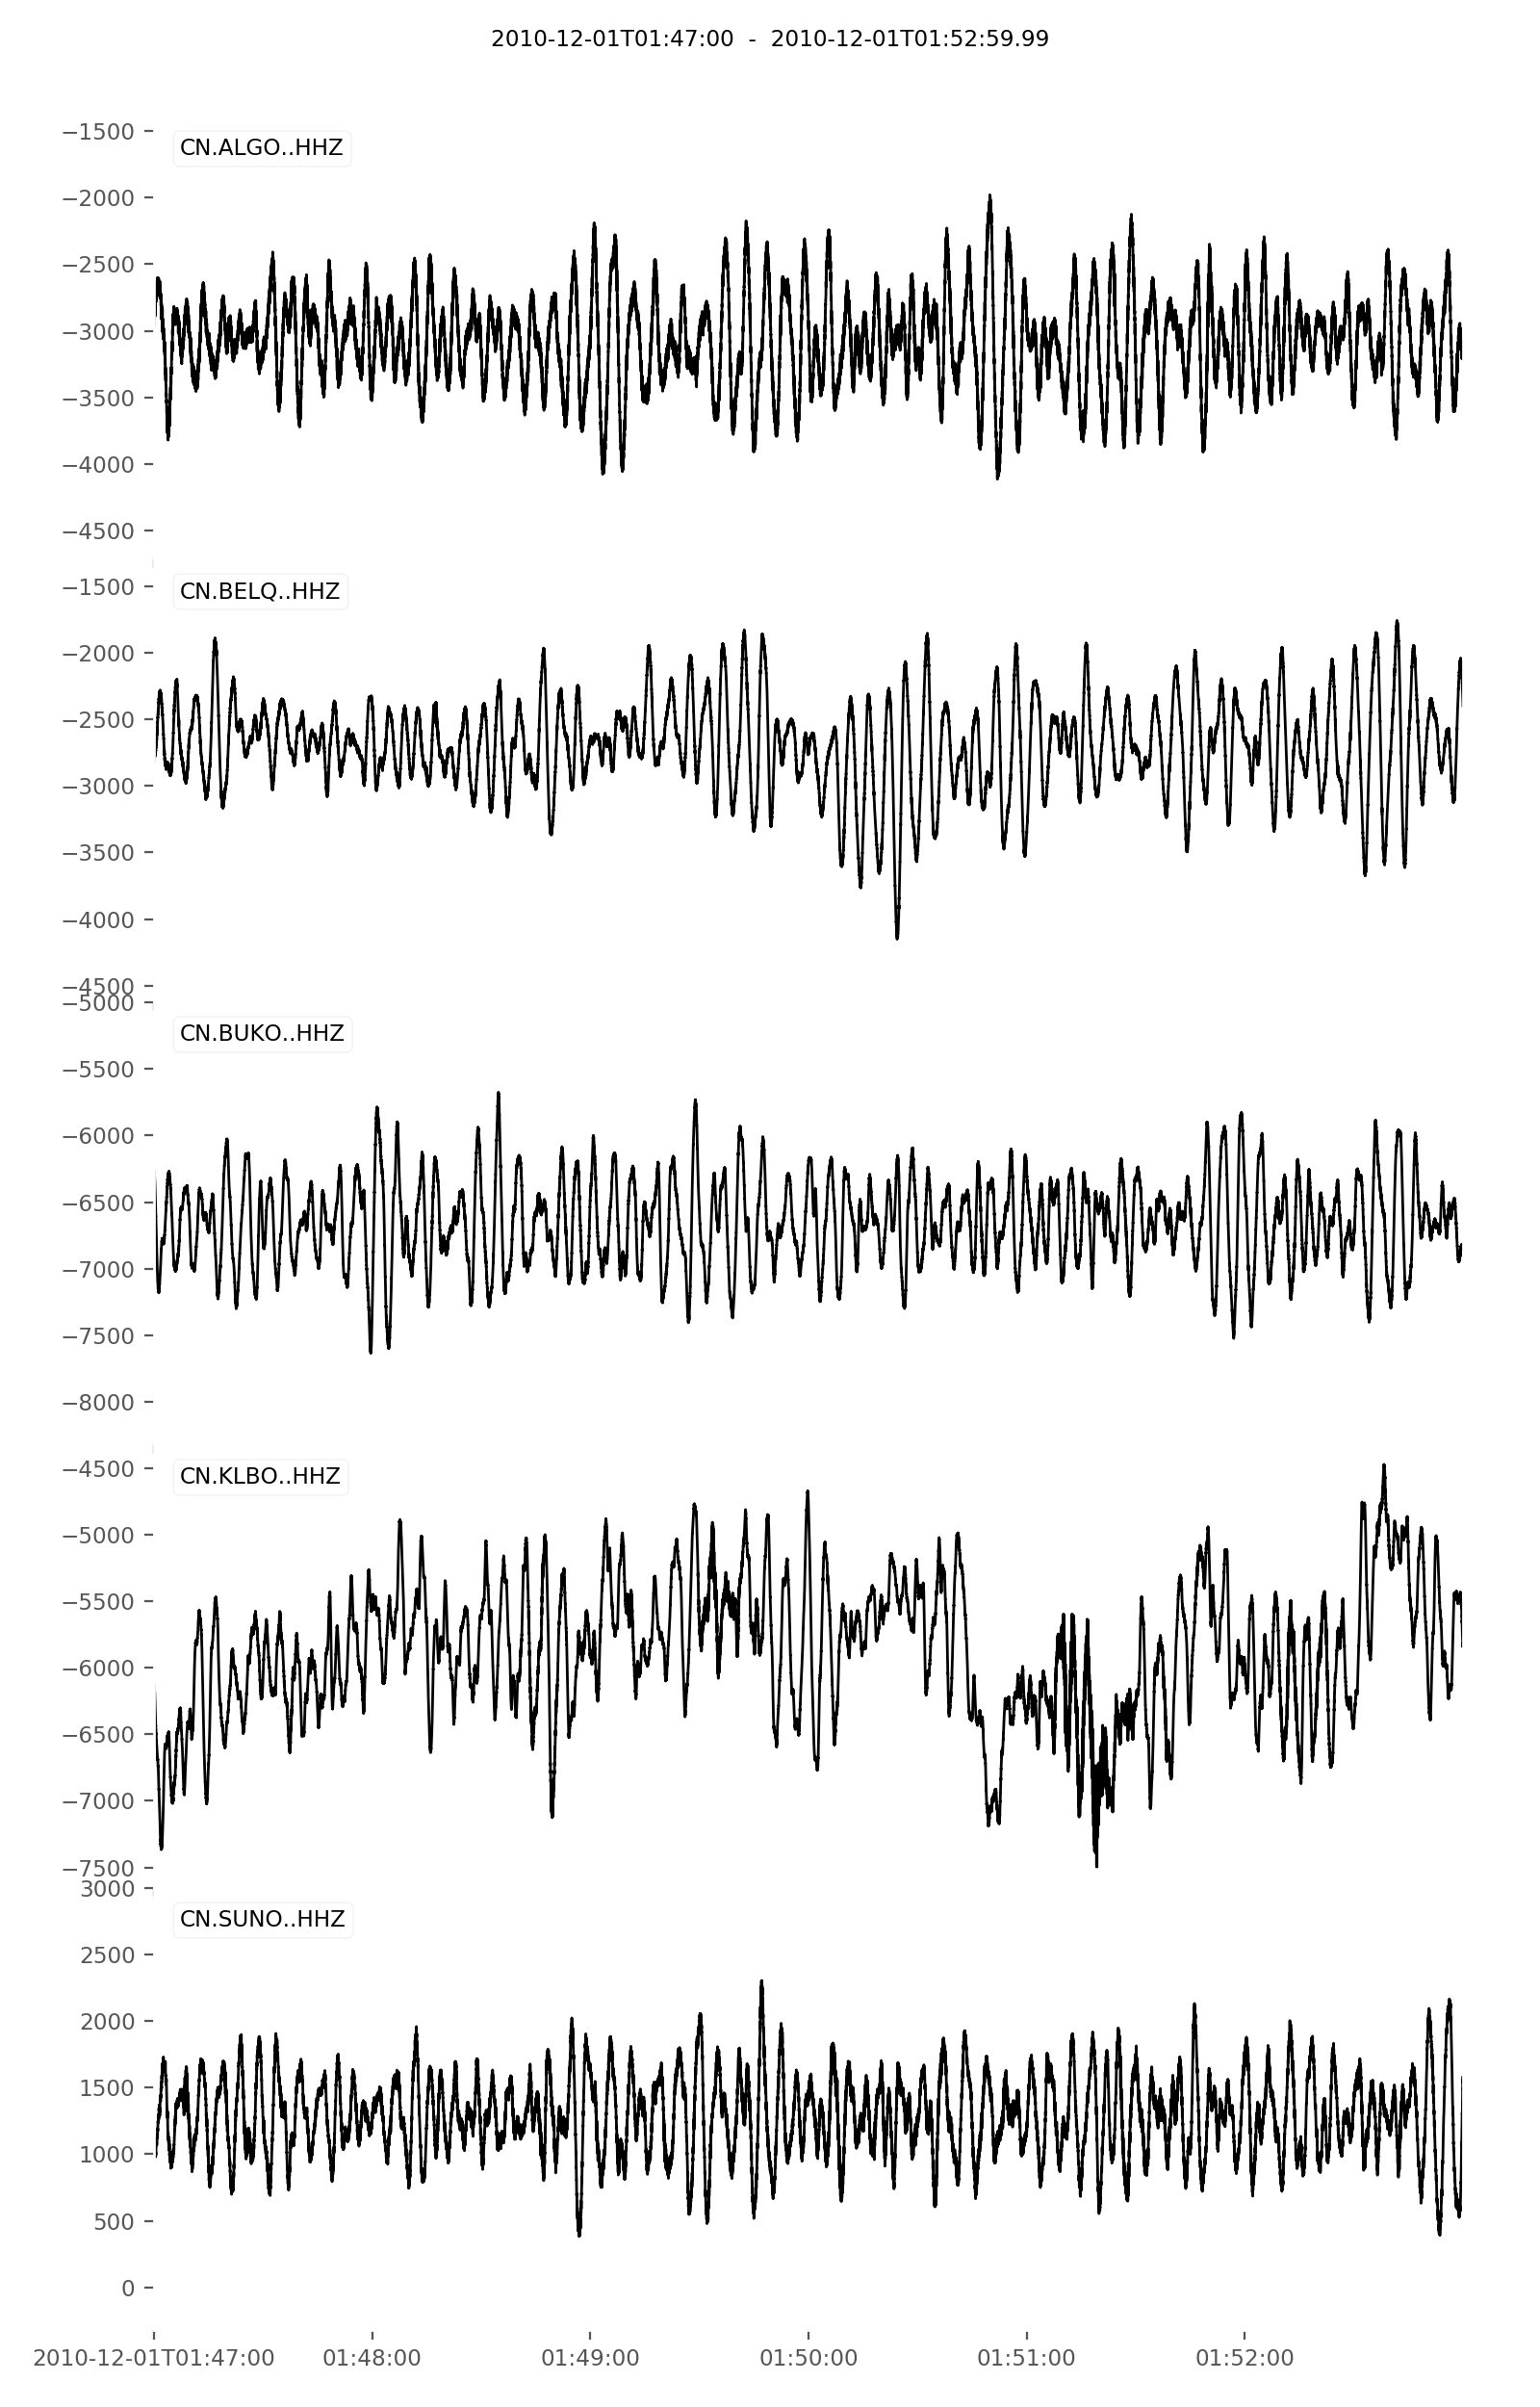

In [4]:
HHZ_st[:5].plot()

In [5]:
print("Station: ", [tr.stats['station'] for tr in HHZ_st])
print("Sampling Rate: ", [tr.stats['sampling_rate'] for tr in HHZ_st])
print("(delta, npts): ", [(tr.stats['delta'], tr.stats['npts']) for tr in HHZ_st])
print("(start time, end time): ", np.array([(tr.stats['starttime'], tr.stats['endtime']) for tr in HHZ_st]))

Station:  ['BELQ', 'ALGO', 'BUKO', 'KLBO', 'SUNO', 'PEMO', 'BANO', 'KILO', 'PLVO', 'TOBO', 'CLWO', 'DELO', 'BMRO', 'PKRO', 'ORIO', 'WLVO', 'DRWO', 'DREO', 'LSQQ', 'BWLO', 'BRCO', 'TORO', 'ALFO', 'PECO', 'ACTO', 'BASO', 'MATQ', 'MALO', 'STCO', 'TYNO', 'ELFO', 'LATQ', 'CHGQ', 'PNPO', 'DMCQ']
Sampling Rate:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
(delta, npts):  [(0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 360

In [7]:
HHZ_stats = [(np.mean(tr.data), np.std(tr.data), (min(tr.data), max(tr.data))) for tr in HHZ_st]
print("Mean\t\t\tStandard Deviation\tmin/max")
for s in HHZ_stats:
    print(s[0], "\t\t", s[1], "\t\t", (s[2][0], s[2][1]))

Mean			Standard Deviation	min/max
-2696.09272222 		 349.003476204 		 (-4152, -1757)
-3075.26169444 		 338.283461742 		 (-4115, -1978)
-6654.54405556 		 321.731363016 		 (-7636, -5674)
-5884.34388889 		 506.815084091 		 (-7497, -4472)
1291.14244444 		 302.615433877 		 (382, 2305)
-179.011833333 		 331.741632439 		 (-1185, 921)
-2487.46094444 		 339.75345927 		 (-3711, -1247)
-1022.41655556 		 455.280861463 		 (-2470, 316)
-6876.69583333 		 298.075120909 		 (-7763, -5922)
-510.413277778 		 303.050603918 		 (-1459, 424)
-4141.40725 		 322.940520681 		 (-5459, -2664)
-2098.74086111 		 296.337797749 		 (-3190, -1098)
-437.463444444 		 353.839501905 		 (-1590, 521)
-384.484611111 		 171.039088407 		 (-1900, 953)
-1578.37169444 		 304.772385713 		 (-2613, -382)
-875.338805556 		 169.844312091 		 (-1564, -180)
-1930.98202778 		 827.199225925 		 (-5327, 1141)
-740.196694444 		 2424.39999071 		 (-10014, 8472)
111.5475 		 295.066838981 		 (-1896, 3199)
821.122055556 		 430.954154551 		 (-402, 202

In [8]:
around0 = obspy.core.stream.Stream()
notaround0 = obspy.core.stream.Stream()
for tr in HHZ_st:
    if (abs(np.mean(tr.data))-np.std(tr.data)) < 0:
        around0.append(tr)
    else:
        notaround0.append(tr)
print(len(around0))
print(len(notaround0))

5
30


<IPython.core.display.Javascript object>


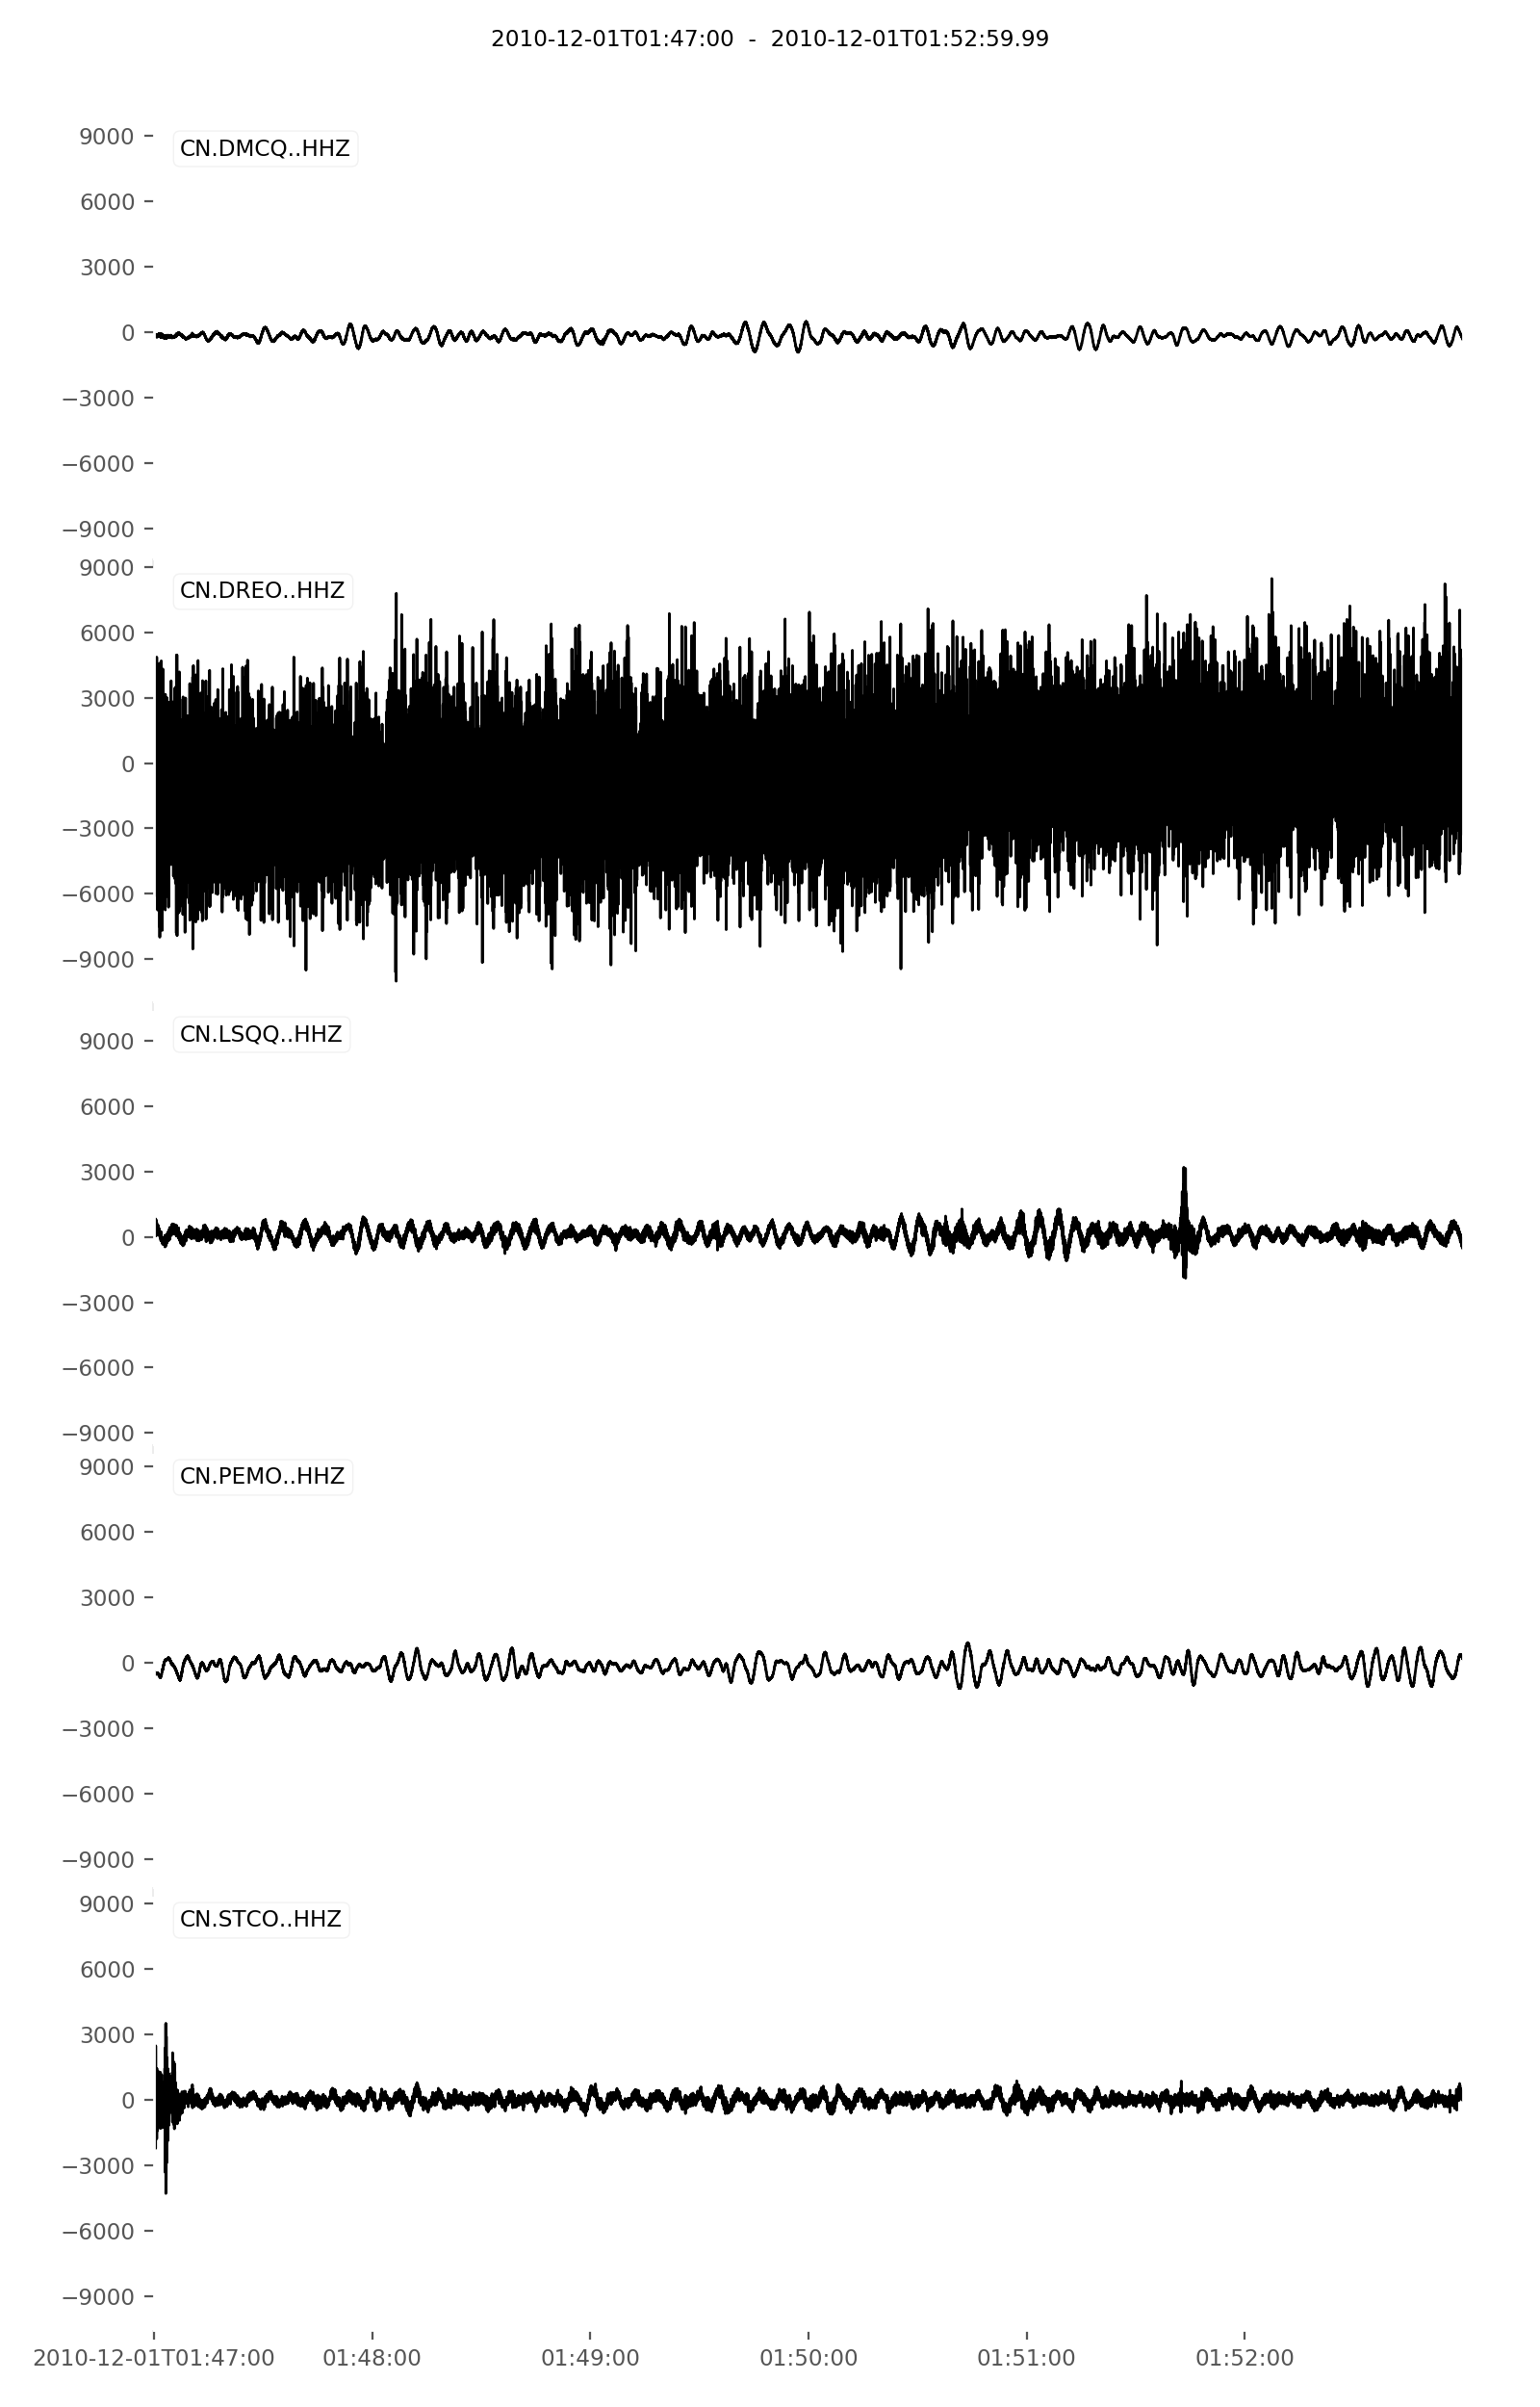

In [9]:
around0[:].plot()

<IPython.core.display.Javascript object>


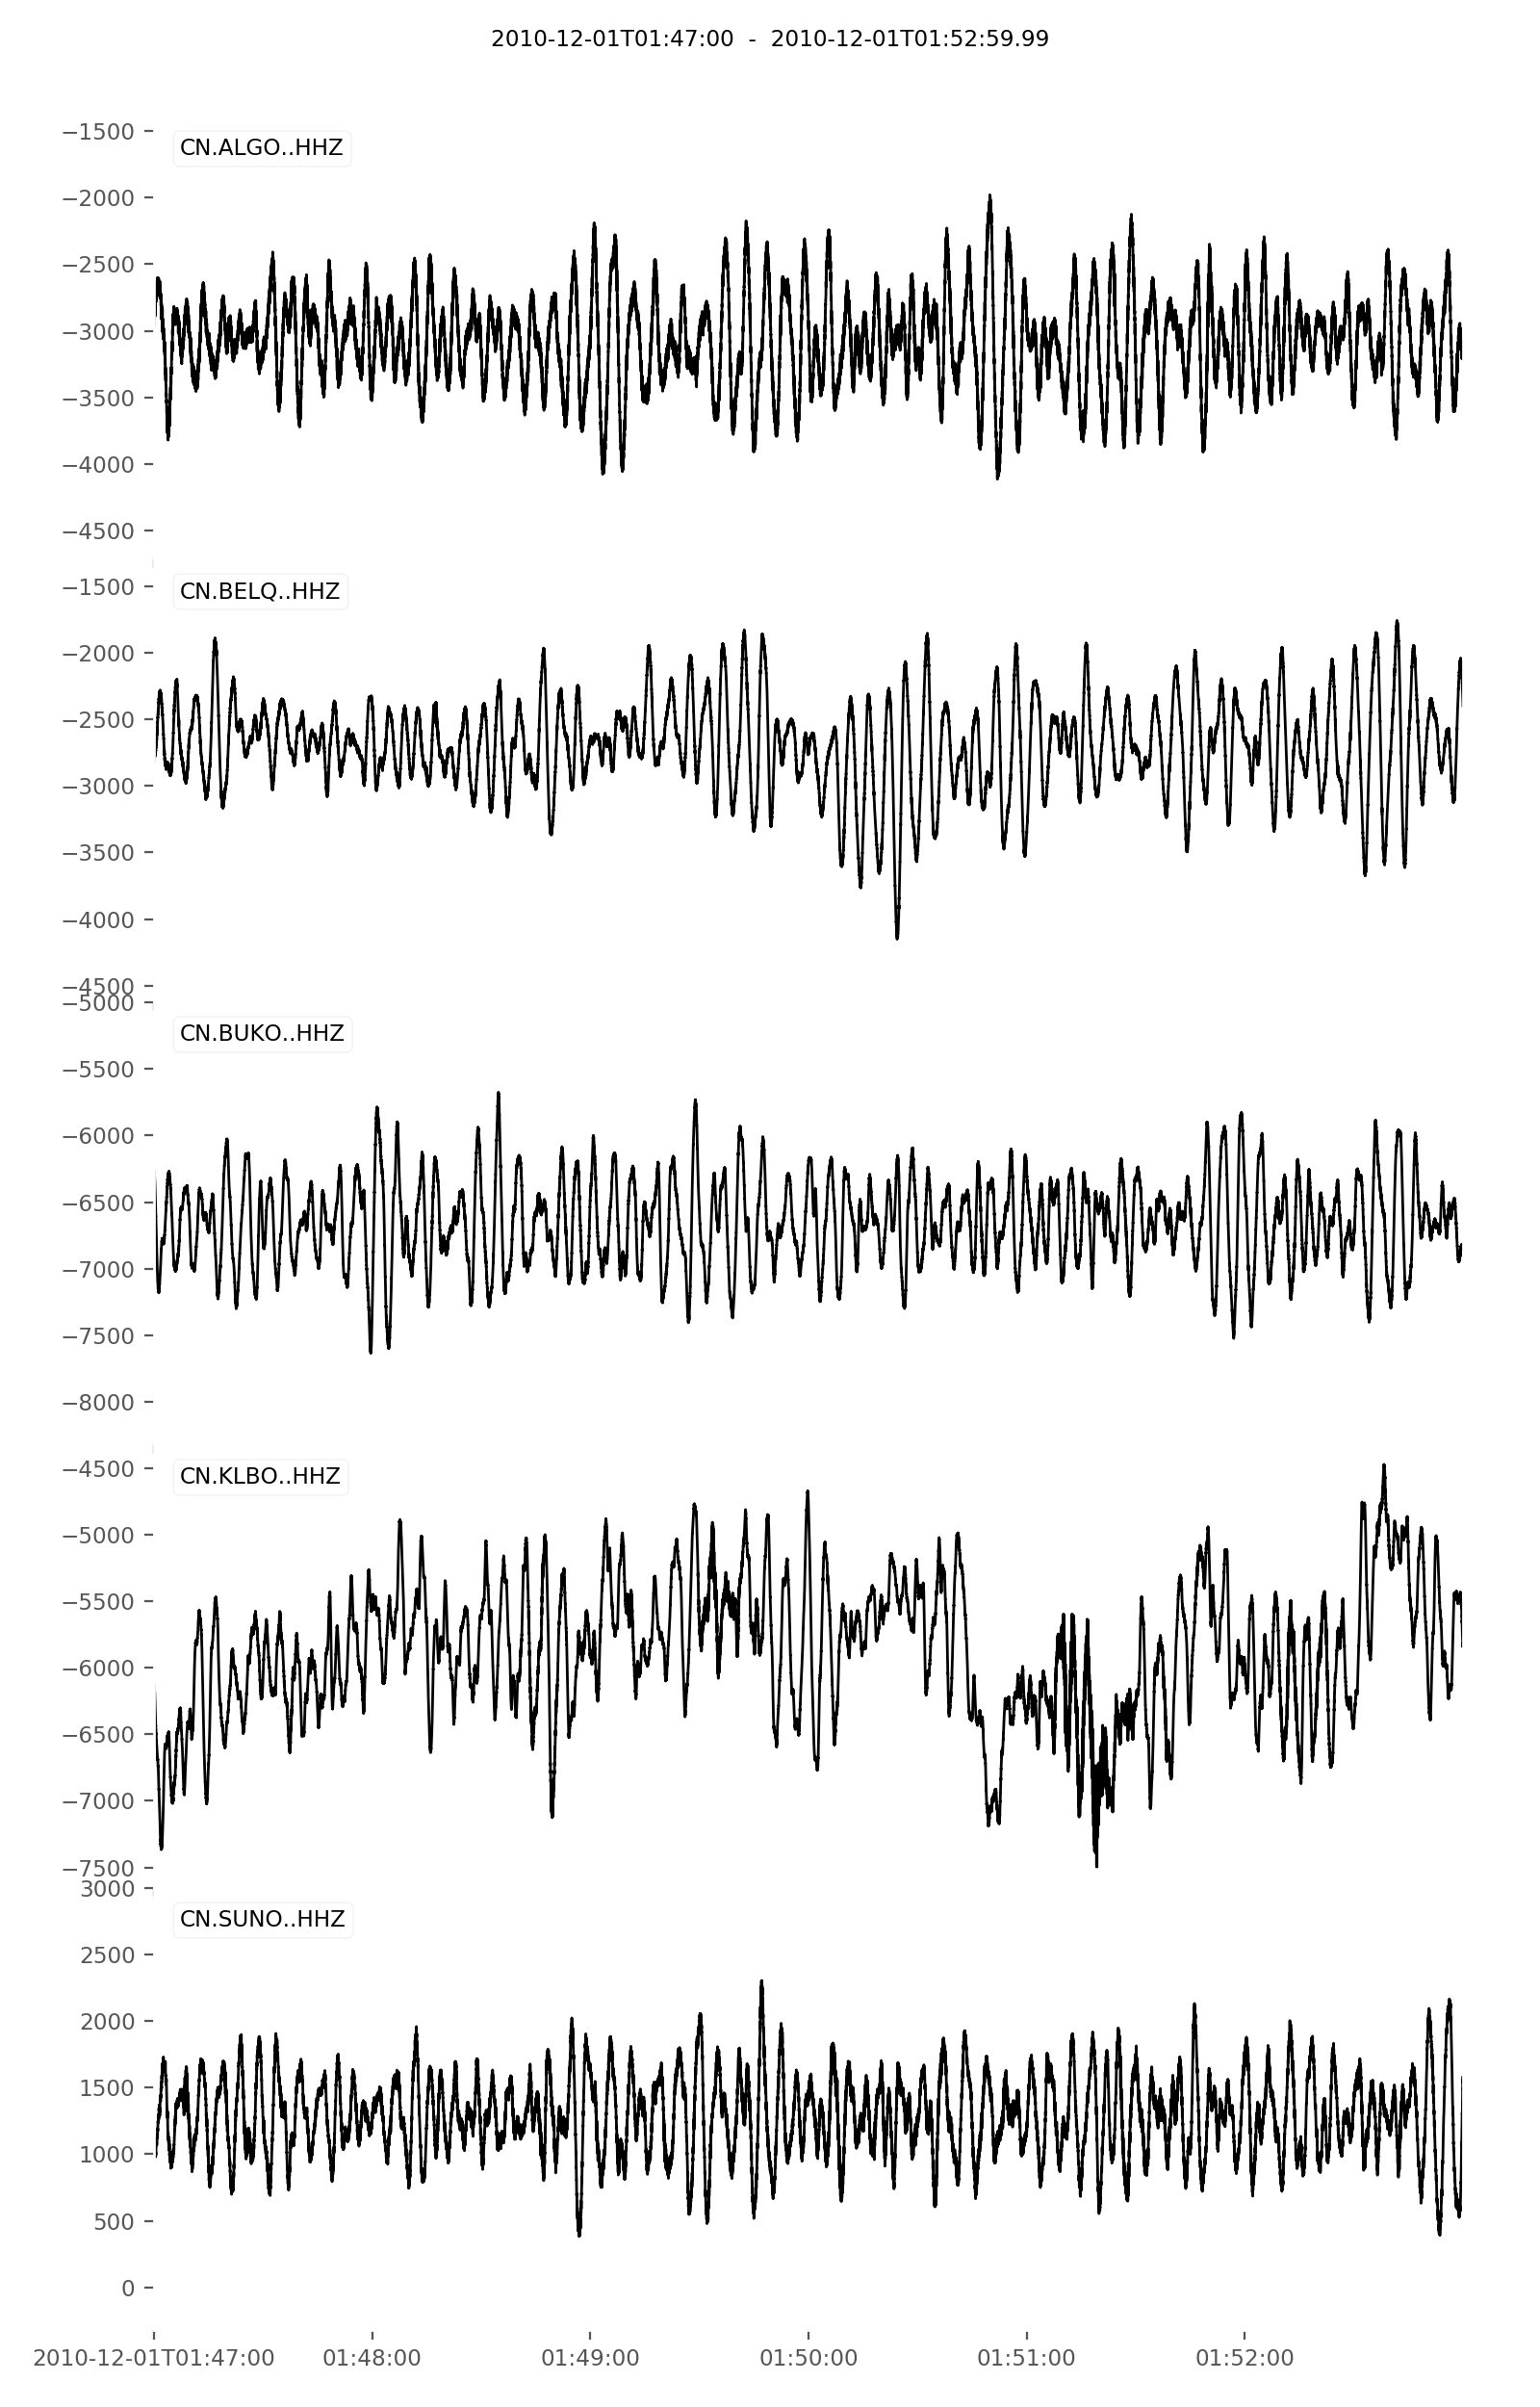

In [10]:
notaround0[:5].plot()